### Black Friday Exploratory Data Analysis (EDA) with Visualization

Objective: To conduct an exploratory data analysis on a dataset of customer purchases from one of the biggest shopping events of the year, Black Friday sales. This will help us understand:

- How different demographics (such as gender, age, occupation, city category) influence purchase behaviors.
- The distribution across different product categories and strategies to handle missing data.
- The role of someone's occupation in determining their purchase behavior.
- Insights into the overall distribution of purchase amounts.
- Context: The dataset used in this analysis is sourced from Kaggle and includes a variety of information about customer demographics, product details, and purchase amounts during a Black Friday sale.

This project is great for beginner data analysts who are eager to dive deep into exploratory data analysis and understand its impact on deriving meaningful insights from a dataset. It's also valuable for marketing professionals and retail companies looking to understand consumer behavior during sales events.

To achieve the objectives outlined above, here's what we did:

1. Data Loading: Open and read the data to see what's in it.
2. Data Cleaning: Look for any missing or strange data and clean it up to make sure everything is accurate and ready for analysis.
3. Data Exploration: Play detective with the data by asking questions, finding answers, and searching for patterns or interesting facts. This includes looking at numbers (like how much people spend) and categories (like age groups or types of products).
4. Data Visualization: Create pictures and graphs from the data to make it easier to see patterns and tell stories about what's happening.
5. Data Analysis: Use statistics and calculations to dig deeper into the data, understand trends, and answer our questions about how different types of customers behave.
6. Insights and Conclusions: After all the cleaning, exploring, visualizing, and analyzing, we'll think about what we've learned and share any interesting discoveries about how people shop on Black Friday.

In [1]:
# Importing data manipulation libraries
import pandas as pd # Pandas provides a DataFrame structure to store data and manipulate tabular data efficiently

# Importing libraries for visualization
import seaborn as sns  # Seaborn extends Matplotlib, it's great for aesthetically pleasing and informative statistical plots
import matplotlib.pyplot as plt # Matplotlib is a plotting library for creating static, interactive, animated visualizations in Python

In [2]:
# Before we can start exploring we must have data to view

# Loading the dataset
df = pd.read_csv("train.csv")

In [3]:
#Find out the size of the dataset
df.shape

(550068, 12)

#### We have 550,068 rows and 12 columns

In [4]:
# Get a basic understanding of the data structure
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Initial Data Observations

Upon reviewing the first few rows of our dataset, we can make some preliminary observations:

- User_ID: This column appears to be a unique identifier for each customer. Since it's a numeric value, we'll need to ensure it's treated as categorical data. 
- Occupation: Represented as integers, the occupation column could be a proxy for income levels or job types, which might impact purchasing power.
- Marital_Status:  This is likely a binary indicator (0 for single, 1 for married), which might influence the types of products purchased.
- Product_Category: There are multiple product category columns, which suggests that customers could purchase items across different categories.
- Missing Values: At a glance, there may be some missing values (indicated by 'NaN'), which we'll need to address in our data cleaning process.
- Data Types: We'll need to review the data types of each column to ensure they align with the expected types (e.g., numerical vs. categorical).

We'll conduct a more thorough investigation to confirm these initial findings and to understand the data better.

## Basic Data Exploration
The purpose of this section is to allow us to dive deeper into the dataset to understand the structure and content of the data we are working with. We'll perform several key steps:

### Checking for Missing Values
Missing values can indicate a number of things for example: data that was not collected, errors in data collection, or fields that do not apply to all observations. Identifying these missing values helps us decide how to handle them - whether to fill them in with a certain value, or to remove the rows or columns entirely.

In python, we will check for missing values in each column by using:
missing_values = df.isnull().sum()

### Descriptive Statistics
Descriptive Statistics will give us an understanding of the central tendencies and shape of the dataset's distribution.  This will help us spot outliers, errors and help to understand the range and types of values that we are working with. We will use df.describe() for this.

### Data Types
By understanding the data types of each column it allows us to determine the type of vsualization we will be able to use and the type of analysis we will be performing. We will do this by using df.dtypes.

In [5]:
# Check for missing numbers
missing_values = df.isnull().sum()
missing_values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

There are no missing values in most of the columns but we do have missing values in Product_Category_2: 173638, Product_Category_3: 383247. It's possible that a product might belong to just one category and not have secondary or third categories.

In [6]:
# Handling missing values in columns - by preserving the information in the columns while clearly indicating the absence of a secondary or tertiary category.

df['Product_Category_2'].fillna(-1, inplace=True)
df['Product_Category_3'].fillna(-1, inplace=True)

In [7]:
# Confirm that there are no more missing values left:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Get Summary Statistics

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.00000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.41977,3.145215,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.56511,6.681039,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,-1.00000,-1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,-1.00000,-1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.00000,-1.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.00000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.00000,18.000000,23961.000000


The mean, std and percentiles of the Purchase column will give Insights into the typical purchase amounts and the distribution of purchases.

The min purchase is 12.00, the max purchase is 23961.00, the mean (average) purchase is 9263.96.  The std is 5023.06, the 25% (which is first quarter) is 5823.00, 50% (second quarter) is 8047.00, 75% (third quarter) is 12054.00. 

*A note on std (standard deviation): 

Std (Standard Deviation): The standard deviation is $5,023.06. This measures how spread out the purchase amounts are from the average. A higher standard deviation indicates that purchase amounts vary a lot, while a lower one indicates that most purchases are close to the average. In this case, the standard deviation is quite high, suggesting that there's a wide range of purchase amounts among customers.

To summarize: 

- Most purchases seem to lie between 5,823.00 and 12,054.00, as indicated by the 25% and 75% percentiles.

- There's a wide range of purchase amounts, from as low as 12.00 and as high as 23,961.00.

- The average purchase amount is 9,263.96, but there's considerable variation around this average, as indicated by the high standard deviation.

This initial analysis gives a sense of the distribution and central tendencies of the 'Purchase' column. 

In [9]:
# Checking the data types of each column
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

## Visual Exploration
Checking to see how different factors influence purchase behaviors.
### Purchase behavior based on Gender:

C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


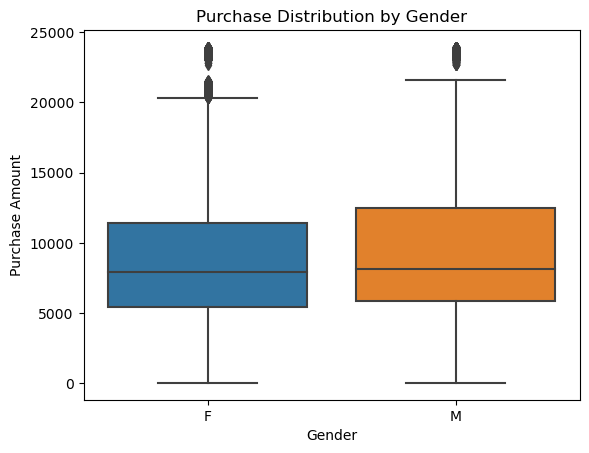

In [10]:
# Is there a difference in purchase behaviors based on Gender

# Create a boxplot to compare a purchase behavior by gender
sns.boxplot(x='Gender', y='Purchase', data=df)

#Add a title to the boxplot for context
plt.title('Purchase Distribution by Gender')

# Add labels for the x-axis and y-axis with clear descriptive names
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')

# Display the plot
plt.show()

In [11]:
# Calucalte the average purchase based on gender

average_purch_by_gend = df.groupby('Gender')['Purchase'].mean()
difference = average_purch_by_gend['M'] - average_purch_by_gend['F']
difference

702.9602753167892

#### Average Purchace Analysis by Gender

We are looking at the average amount of money spent by each gender. Using a technique called 'grouping' in  order to separate the purchases made by males and females. Then, we calculate the average (mean) purchase amount for each group. This provides us with a simple way to compare how much each gender spends on average during Black Friday sales

#### Interpreting the Average Purchase Difference

The difference in average purchase amounts between male and females is shown above. In this case males spent more than females. This average can help retailers understand who is spending more based on gender, which could potentially influence marketing strategies.

On average men spend 702.96 more than women

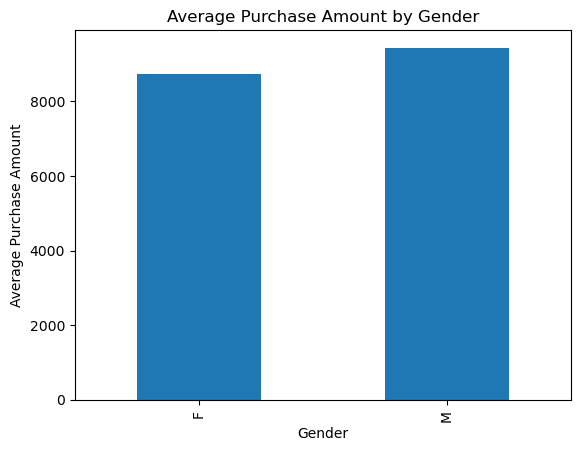

In [12]:
# Plot the average purchase amounts by gender
average_purch_by_gend.plot(kind='bar', title='Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

### Purchase behavior based on Age:

In [13]:
#To determine what ages are being used in the dataset
unique_age_groups = df['Age'].unique()
print(sorted(unique_age_groups))

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


In [14]:
average_purch_by_age = df.groupby('Age')['Purchase'].mean()
average_purch_by_age

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

### Average Purchase Analysis by Age Group
We are looking at how spending behavior changes with age. First, we identified all the unique age groups present in our data. Then we calculated the average amount spent by each group during the Black Friday sales. This is going to help us see which age groups tend to spend more and might be of a particular interest to marketers or store layout planners.

#### Interpreting Average Purchase by Age Group

From the information above, we can see that spending increases with age up to a certain point, then it stablizes slightly or decreases slightly. The group '51-55' spends the most on average, while the '0-17' age group spends the least. This may reflect the increased financial stability and purchasing power that comes with age.

#### The Boxplot of Purchase Amounts by Age Group
The boxplot below provides a visual representation of the spending distribution within each age group. Not only can we see the average spent, but also how spread out the purchases are around the median, and if there are any outliers. This visualization can help us spot patterns and anomalies in spending across different age brackets.

C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


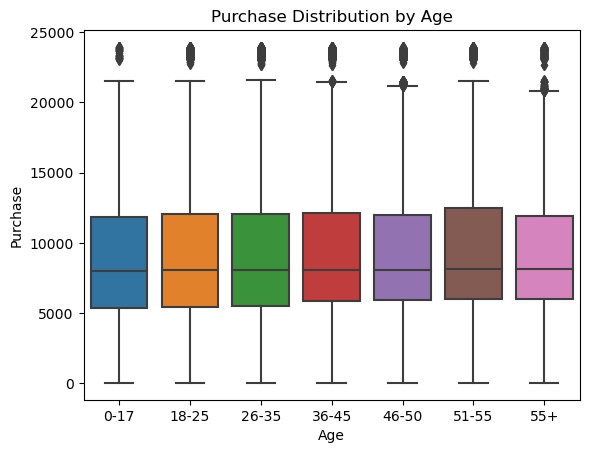

In [15]:
sns.boxplot(x='Age', y='Purchase', data=df, order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Purchase Distribution by Age')
plt.show()

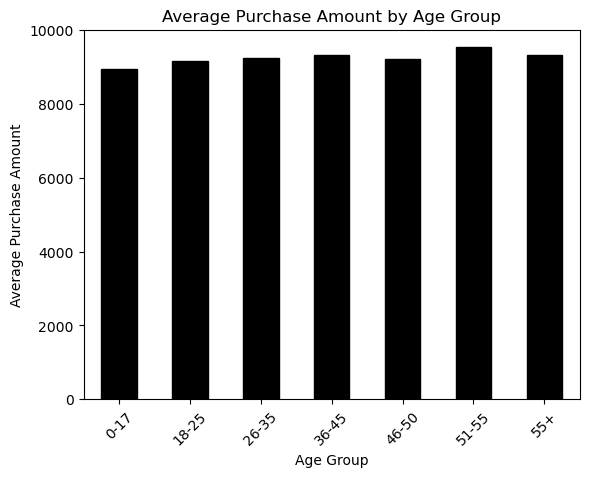

In [16]:
# Plot the average purchase amounts by age group

average_purch_by_age.plot(kind='bar', color='black', edgecolor='black')
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis to prevent overlap
plt.show()

The bar graph above shows the average purchase amount for each age group. It provides a clear visual comparison that can quickly reveal which age groups tend to spend more or less. This can be useful for tailoring marketing campaigns or store layouts to specific age demographics.


#### Purchase Distribution based on City_Category:
Next, we'll explore how the city category affects purchase behavior. The boxplot will allow us to see not only the average purchase values but also the spread and outliers within each city category. This could highlight differences in spending habits based on the urbanization level or other factors related to the city category.


C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


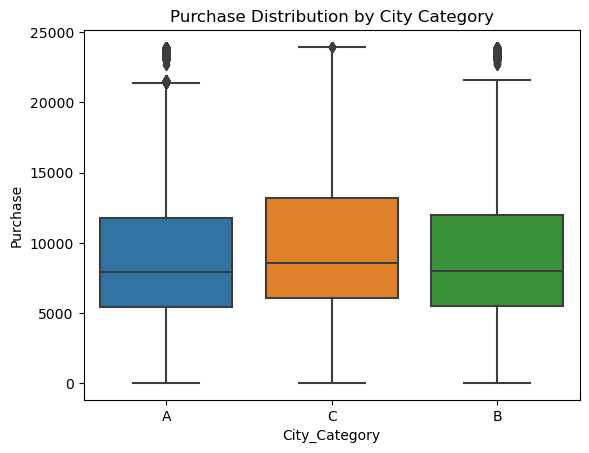

In [17]:
sns.boxplot(x='City_Category', y='Purchase', data=df)
plt.title('Purchase Distribution by City Category')
plt.show()

#### Insights from Purchase Distribution by City Category

The boxplot indicates that customers from City_Category C spend more on average compared to Categories A and B. This pattern is also reflected in the calculated average purchase amounts:

- City_Category A: Average purchase of approximately 8911.94.
- City_Category B: Average purchase of about 9151.30.
- City_Category C: Highest average purchase amount of 9719.92.

This information is valuable for formulating targeted marketing strategies or making inventory management decisions. For example, more premium products could be stocked in stores located in City_Category C.


City_Category A: Customers from this city category spend an average of approximately 8911.94.
City_Category B: Customers from this city category have an average purchase amount of about 9151.30.
City_Category C: Customers from this city category spend the most, with an average purchase amount of 9719.92.

The trend that we can observe is: 

Customers from City_Category C tend to spend more than those from Categories A and B.
The spending of customers from City_Category B is slightly higher than those from City_Category A.

Depending on the context, these insights would be valuable for targeted marketing, inventory management or other business decisions.

#### Average Purchase Analysis by City_Category

In [18]:
average_purch_by_city = df.groupby('City_Category')['Purchase'].mean()
average_purch_by_city

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

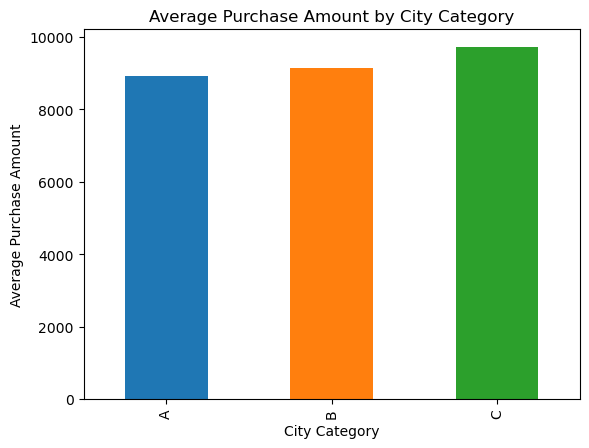

In [19]:
# Plot the average purchase amounts by city category

average_purch_by_city.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.show()

#### Average Purchase Amount by City Category

The bar graph complements the boxplot by clearly showing the average purchase amount in each city category. It reinforces the observation that customers from City_Category C spend the most on average, with City_Category B being in the middle, and A spending the least. These visual insights can be directly applied to business decisions regarding where to focus marketing efforts and how to allocate inventory.


### Multiple Variable Exploration:
Checking behaviors based on Age and City_Category

#### Exploring Spending Behaviors by Age and City Category

We are now looking into a more complex analysis by looking at how spending behavior may vary not only by age but also by the city category. This kind of exploration can reveal if there are any interaction effects between age and city category — for instance, whether younger people spend differently in urban areas compared to rural ones.

C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


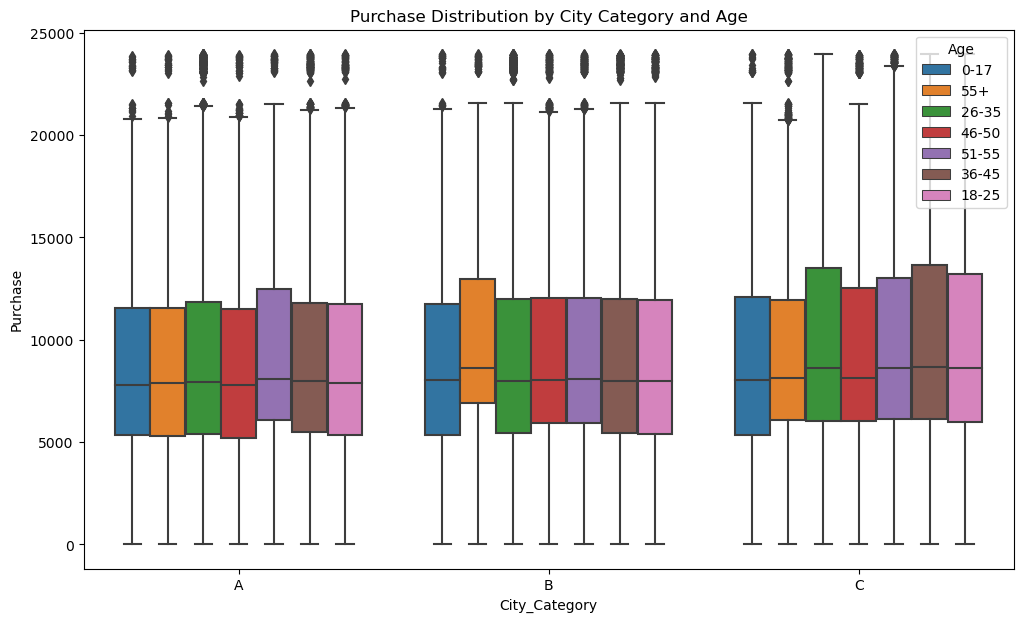

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='City_Category', y='Purchase', hue='Age', data=df, order=['A', 'B', 'C'])
plt.title('Purchase Distribution by City Category and Age')
plt.show()

#### Interpretation of Purchase Distribution by City Category and Age

The boxplot above shows the distribution of purchases across different city categories, broken down by age groups. This allows us to see if certain age groups tend to spend more or less in specific city categories. For instance, we might observe that older age groups spend more in City Category C, which could be indicative of higher disposable income or different preferences.

City_Category A: Younger age groups (0-17 and 18-25) tend to spend slightly less than the 26-35 and 36-45 age groups. Interestingly, the 51-55 age group has the highest average spend in this category.

City_Category B: The spending seems to increase with age, there is a slight dip in the 36-45 age range. The age group 55+ spends the most in this city category.

City_Category C: There's a noticeable increase in spending from the younger to the middle age groups (0-17 to 36-45). After that, there's a slight decrease in the older age groups.

Overall, City_Category C appears to have higher spending across most age groups compared to City_Category A and City_Category B.

These insights can be valuable for targeted marketing and sales strategies.  For example, a new product that is targeted to the age group 26-35 it may perform better in City Category C, based on the spending patterns observed.

To Calculate the average purchase based on City_Category and Age:

In [21]:
average_purch_by_city_and_age = df.groupby(['City_Category', 'Age'])['Purchase'].mean().unstack()
average_purch_by_city_and_age

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,8615.110456,8833.734084,8952.503004,8990.333997,8348.526752,9508.505001,8485.945424
B,8917.295308,9031.706985,9149.193178,9107.901067,9247.927129,9340.911392,9803.560635
C,9059.503299,9696.570919,9835.388993,9882.012654,9533.184023,9780.380806,9385.316939


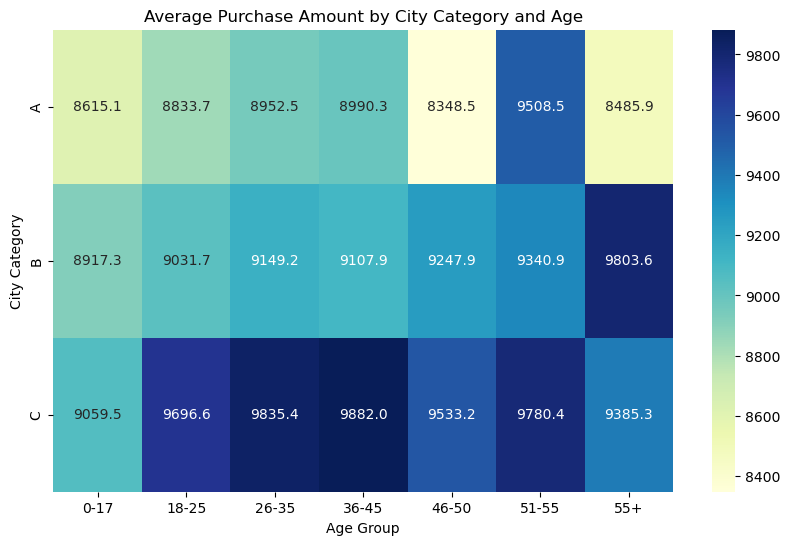

In [22]:
# Heatmap of average purchase amounts by city category and age

plt.figure(figsize=(10, 6))
sns.heatmap(average_purch_by_city_and_age, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Purchase Amount by City Category and Age')
plt.xlabel('Age Group')
plt.ylabel('City Category')
plt.show()

#### Heatmap of Average Purchases by City Category and Age

The heatmap above visualizes the average purchase amount across different city categories and age groups. Each cell in the heatmap corresponds to a specific combination of age group and city category, with the color intensity reflecting the average purchase amount. This allows us to easily spot which combinations correspond to higher or lower spending.

#### Spending Behavior by Gender Across City Categories

We will now explore how spending behavior varies by gender within each city category. This boxplot visualization will help us compare the distribution of purchases between male and female customers across urban (City_Category A), suburban (City_Category B), and rural (City_Category C) settings.

C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

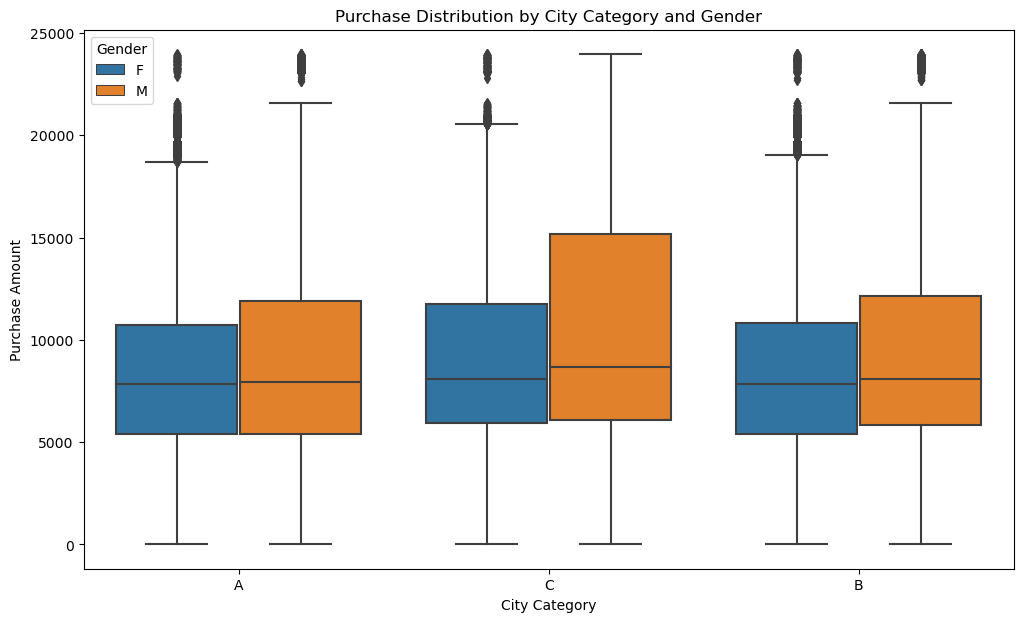

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='City_Category', y='Purchase', hue='Gender', data=df)
plt.title('Purchase Distribution by City Category and Gender')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.legend(title='Gender')
plt.show()

#### Analysis of Purchase Distribution by Gender and City Category

The boxplot reveals potential differences in purchase amounts between male and female shoppers across different city categories. Such insights are crucial for tailoring marketing campaigns. For example, if male shoppers in City_Category C are spending more than females, marketing efforts in that category could be adjusted to target them more effectively.


In [24]:
average_purch_by_city_and_gender = df.groupby(['City_Category', 'Gender'])['Purchase'].mean().unstack()
average_purch_by_city_and_gender

Gender,F,M
City_Category,,
A,8579.708576,9017.834470
B,8540.677694,9354.854433
C,9130.107518,9913.567248


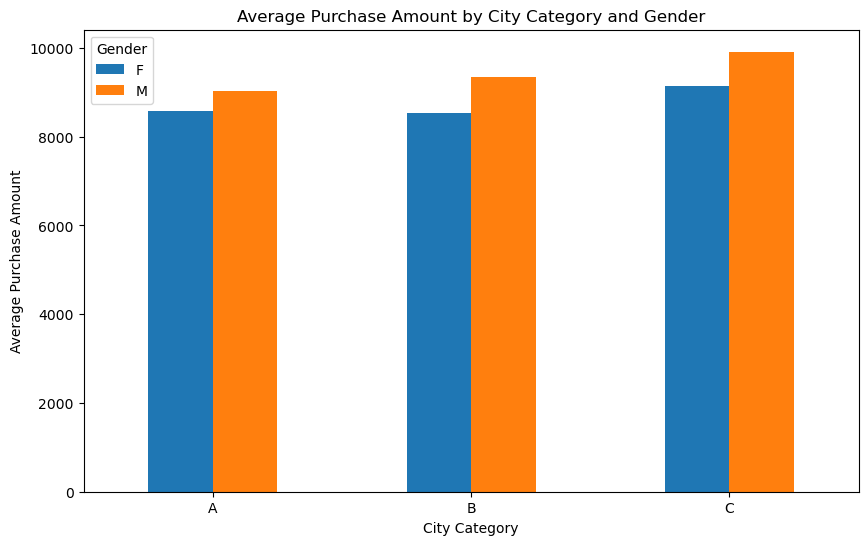

In [25]:
# Bar chart of average purchase amounts by city category and gender

average_purch_by_city_and_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Amount by City Category and Gender')
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

#### Bar Chart of Average Purchases by City Category and Gender

The bar chart above illustrates the average purchase amount for each gender within the different city categories. It clearly shows whether males or females spend more in each city category, providing a straightforward comparison. This visual can be extremely useful for identifying gender-specific trends in spending across urban, suburban, and rural areas.

#### Interpretation of Gender-Based Average Purchases by City Category

The chart may reveal, for instance, that male customers spend more on average than female customers, particularly in City_Category C. Such patterns can help businesses understand where to focus their marketing efforts or how to tailor their product offerings to meet the demands of different demographic segments.


#### Exploring Purchase Behavior by Occupation

Understanding the relationship between occupation and spending can offer insights into the economic status and purchasing preferences of different professional groups. In this analysis, we will create a boxplot to visualize the distribution of purchase amounts for each occupation category.


C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\caris\Desktop\eda_in_pandas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


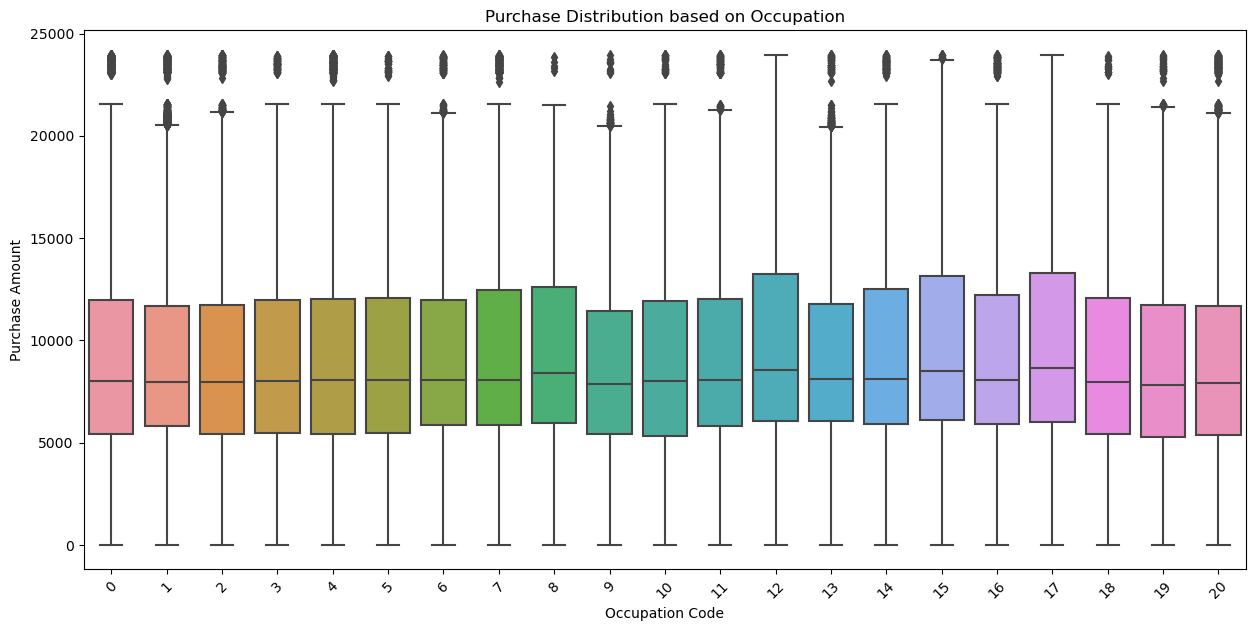

In [26]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Occupation', y='Purchase', data=df)
plt.title('Purchase Distribution based on Occupation')
plt.xlabel('Occupation Code')  # Assuming 'Occupation' is coded numerically
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)  # Rotate x labels if they overlap or are too many
plt.show()

#### Interpretation of Purchase Distribution by Occupation

The boxplot provides a visual summary of the purchase amounts across different occupations. The central line in each box represents the median purchase amount, while the extent of the boxes indicates the interquartile range (middle 50% of purchases). Outliers may indicate exceptional spending behavior or data entry errors and could warrant further investigation.

In [27]:
average_purch_by_occupation = df.groupby('Occupation')['Purchase'].mean()
average_purch_by_occupation

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

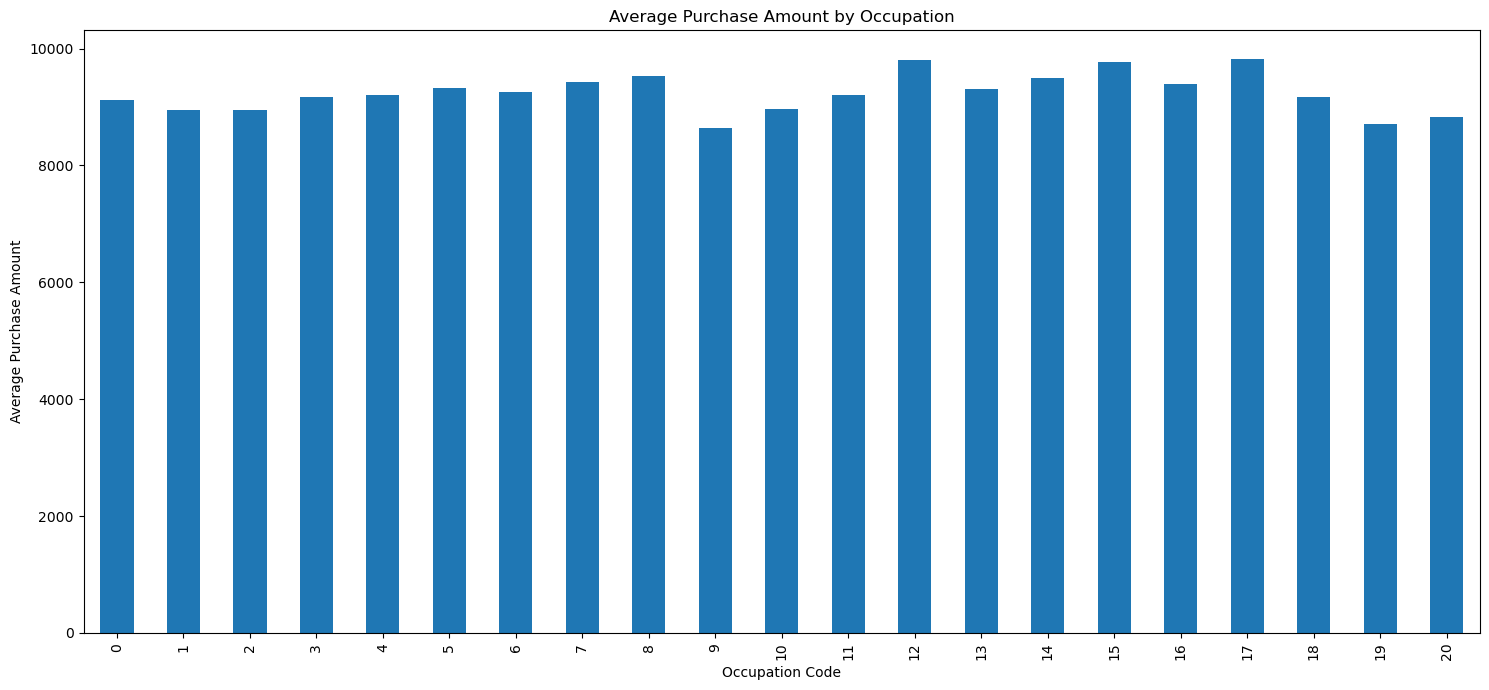

In [28]:
# Now let's create a bar chart for the average purchase by occupation

average_purch_by_occupation.plot(kind='bar', figsize=(15, 7))
plt.title('Average Purchase Amount by Occupation')
plt.xlabel('Occupation Code')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the x-axis labels
plt.show()

#### Interpretation of Average Purchase Amount by Occupation

The bar chart represents the average purchase amount for each occupation, identified by codes ranging from 0 to 20. Here's what we can deduce from the data:

- **Variations in Spending Based on Occupation**: There are noticeable differences in average spending among the occupations. For instance, occupation groups 12 and 17 exhibit higher spending, while groups 9 and 19 are on the lower end of the average spending spectrum.

- **General Spending Trend**: Despite some variations, the spending is relatively consistent across most occupation groups, with values typically ranging from approximately 8800 to 9800.

- **No Hierarchical Significance**: The occupation codes are categorical identifiers and do not imply any ranking or hierarchy.

These insights can be instrumental for businesses in crafting targeted marketing campaigns and strategic product placements. Understanding the spending habits of each occupation group can significantly enhance the effectiveness of marketing initiatives and potentially boost sales.


### In conclusion:

Throughout this exploratory data analysis of Black Friday sales data, we've uncovered several intriguing patterns and relationships:

1. **Spending Patterns by Gender**: We observed that there is a difference in the distribution of purchase amounts between genders, with males showing a slightly higher median purchase amount.

2. **Age-Related Insights**: The age group analysis revealed that spending tends to increase with age, peaking at the '51-55' age bracket before slightly declining.

3. **Occupational Influence**: Our investigation into occupational spending highlighted that certain occupational groups, particularly those coded as 12 and 17, demonstrated higher average spending.

4. **City Category Spending**: Customers from different city categories displayed distinct spending behaviors, with City Category C showing the highest average purchase amount.

5. **Multi-Variable Analysis**: By examining the interactions between variables such as age, gender, and city category, we were able to identify more nuanced spending behaviors that could be leveraged for more targeted marketing strategies.

#### Limitations

The analysis is based on the data provided and does not account for external factors such as economic conditions, seasonal effects, or customer sentiments that could also influence purchasing behavior.

#### Future Work

Further studies could include predictive modeling to forecast sales, cluster analysis to segment customers, or sentiment analysis on customer reviews. Additionally, a deeper dive into the impact of promotions and discounts on purchase behavior during Black Friday could yield actionable insights for retailers.

#### Business Implications

Retailers can utilize these insights to tailor their marketing efforts, adjust their inventory to match consumer demand, and develop personalized promotions to enhance customer engagement and boost sales.

---

This project has provided valuable insights into consumer behavior during one of the busiest shopping periods of the year. It showcases the power of data analysis in making informed business decisions and highlights areas for further research.